In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [92]:
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [93]:
df.shape

(1599, 12)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [95]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [96]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [97]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [98]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

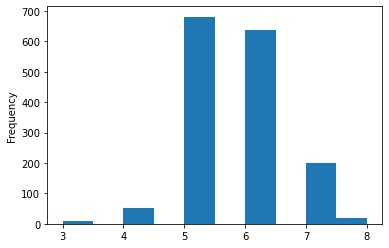

In [99]:
df['quality'].plot.hist()

#we see most of the wines are of average quality, less than half are above average while even fewer are below average.

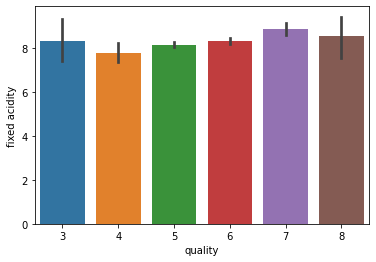

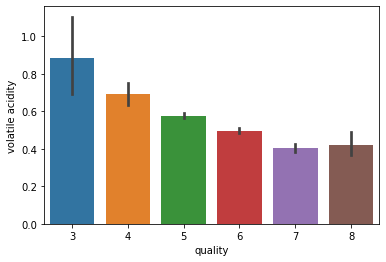

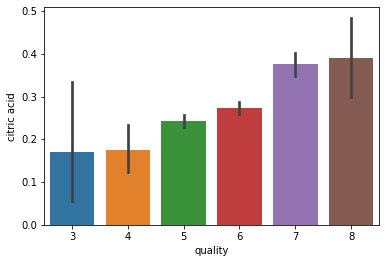

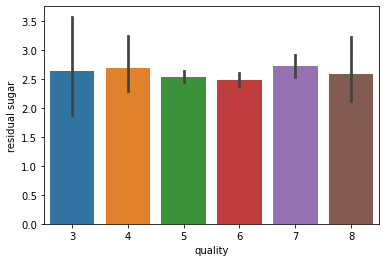

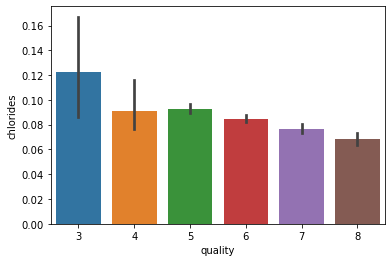

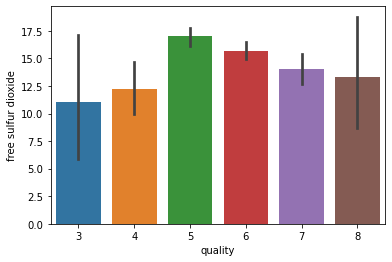

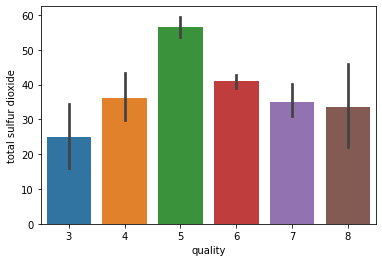

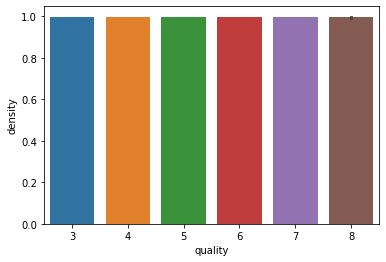

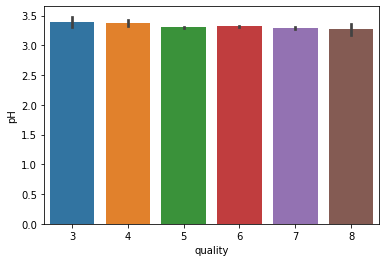

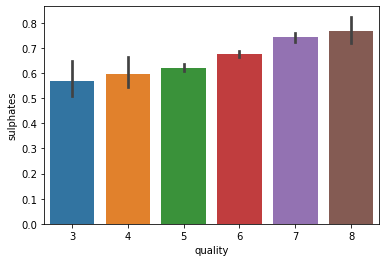

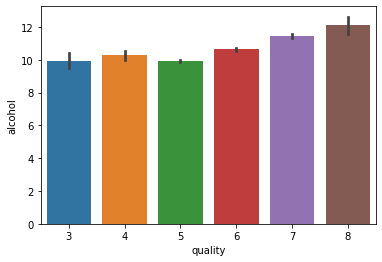

In [100]:
features=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

for i in features:
    plt.figure()
    sns.barplot(x='quality',y=df[i],data=df)


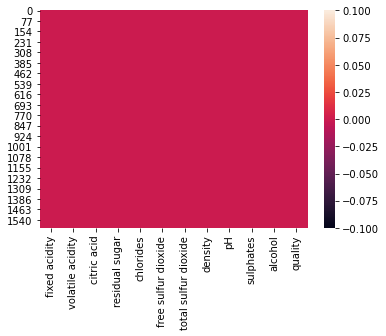

In [101]:
sns.heatmap(df.isnull())

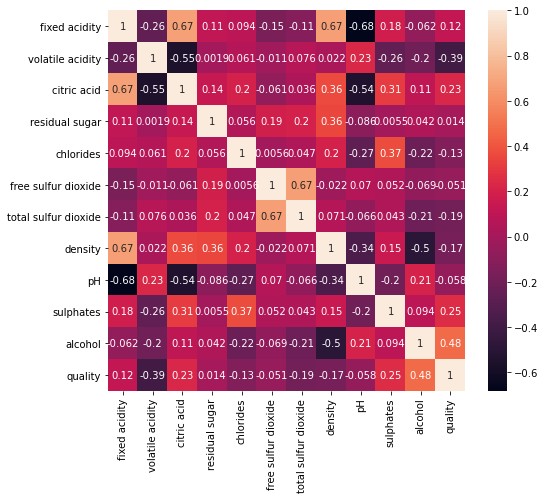

In [102]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),annot=True)

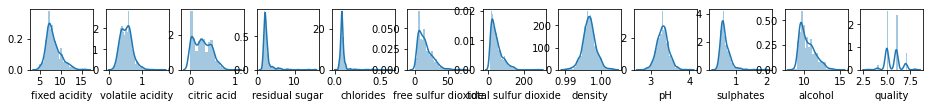

In [103]:
collist=df.columns.values
nrows=12
ncol=12

plt.figure(figsize=(16,16))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

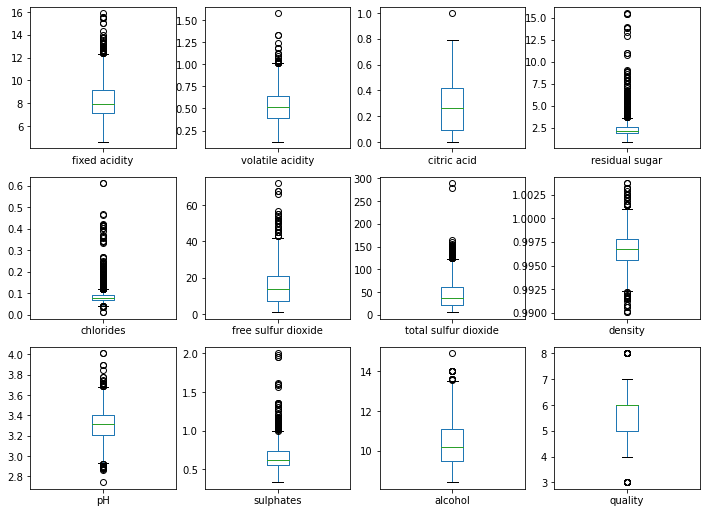

In [104]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(12,12))
plt.show()

In [105]:
from scipy.stats import zscore
z_score=np.abs(zscore(df))
print(df.shape)
df_new=df.loc[(z_score<3).all(axis=1)]
print(df_new.shape)

(1599, 12)
(1451, 12)


In [106]:
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [107]:
x=df_new.iloc[:,0:-1]
x.shape

(1451, 11)

In [108]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x)
x=pd.DataFrame(x)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [109]:
y=pd.DataFrame(df_new['quality'])


In [120]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [121]:
print('x_train_shape:',x_train.shape)
print('x_test_shape:',x_test.shape)
print('y_train_shape:',y_train.shape)
print('y_test_shape:',y_test.shape)

x_train_shape: (1160, 11)
x_test_shape: (291, 11)
y_train_shape: (1160, 1)
y_test_shape: (291, 1)


In [122]:
from sklearn.model_selection import GridSearchCV

parameters={'criterion':['gini','entropy']}
dtc=DecisionTreeClassifier()
clf=GridSearchCV(dtc,parameters)
clf.fit(x,y)

print(clf.best_params_)

{'criterion': 'gini'}


In [123]:
#decisiontreeclassifier

dtc=DecisionTreeClassifier(criterion='gini')
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,preddtc))
print('\n')
print(confusion_matrix(y_test,preddtc))
print('\n')
print(classification_report(y_test,preddtc))

accuracy_score: 0.5189003436426117


[[ 0  5  5  1  0]
 [ 7 66 43  4  0]
 [ 4 35 61 14  2]
 [ 0  4 11 24  1]
 [ 0  0  1  3  0]]


              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.60      0.55      0.57       120
           6       0.50      0.53      0.51       116
           7       0.52      0.60      0.56        40
           8       0.00      0.00      0.00         4

    accuracy                           0.52       291
   macro avg       0.33      0.34      0.33       291
weighted avg       0.52      0.52      0.52       291



In [124]:
parameters={'kernel':['linear','rbf','poly'],'C':[1,10]}
svc=SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)


print(clf.best_params_)

{'C': 10, 'kernel': 'linear'}


In [125]:
#svc

svc=SVC(kernel='linear',C=10)
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,predsvc))
print('\n')
print(confusion_matrix(y_test,predsvc))
print('\n')
print(classification_report(y_test,predsvc))

accuracy_score: 0.5670103092783505


[[ 0  8  2  1  0]
 [ 0 86 34  0  0]
 [ 0 40 71  5  0]
 [ 0  6 26  8  0]
 [ 0  0  2  2  0]]


              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.61      0.72      0.66       120
           6       0.53      0.61      0.57       116
           7       0.50      0.20      0.29        40
           8       0.00      0.00      0.00         4

    accuracy                           0.57       291
   macro avg       0.33      0.31      0.30       291
weighted avg       0.53      0.57      0.54       291



In [126]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,predknn))
print('\n')
print(confusion_matrix(y_test,predknn))
print('\n')
print(classification_report(y_test,predknn))

accuracy_score: 0.4570446735395189


[[ 0  6  5  0  0]
 [ 0 81 39  0  0]
 [ 1 63 44  8  0]
 [ 2 12 18  8  0]
 [ 0  2  0  2  0]]


              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.49      0.68      0.57       120
           6       0.42      0.38      0.40       116
           7       0.44      0.20      0.28        40
           8       0.00      0.00      0.00         4

    accuracy                           0.46       291
   macro avg       0.27      0.25      0.25       291
weighted avg       0.43      0.46      0.43       291



In [127]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=50,random_state=43)

rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.6804123711340206
[[ 0  7  3  1  0]
 [ 1 88 29  2  0]
 [ 0 27 86  3  0]
 [ 0  4 12 24  0]
 [ 0  0  1  3  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.70      0.73      0.72       120
           6       0.66      0.74      0.70       116
           7       0.73      0.60      0.66        40
           8       0.00      0.00      0.00         4

    accuracy                           0.68       291
   macro avg       0.42      0.41      0.41       291
weighted avg       0.65      0.68      0.66       291



In [128]:
#saving the best model
import joblib

joblib.dump(rf,'rffile.obj')

['rffile.obj']